In [1]:
import numpy as np
import matplotlib.pyplot as plt
from idanalysis import IDKickMap
from scipy.optimize import curve_fit
import sympy
import utils
from mathphys.functions import load_pickle
import mathphys.constants as cts
from fieldmaptrack import Beam

In [2]:
def calc_idkmap_kicks(idkickmap, plane_idx=0, var='X'):
        beam = Beam(energy=3)
        brho = beam.brho
        rx0 = idkickmap.posx
        ry0 = idkickmap.posy
        fposx = idkickmap.fposx
        fposy = idkickmap.fposy
        kickx = idkickmap.kickx
        kicky = idkickmap.kicky
        if var.lower() == 'x':
            rxf = fposx[plane_idx, :]
            ryf = fposy[plane_idx, :]
            pxf = kickx[plane_idx, :]/brho**2
            pyf = kicky[plane_idx, :]/brho**2
        elif var.lower() == 'y':
            rxf = fposx[:, plane_idx]
            ryf = fposy[:, plane_idx]
            pxf = kickx[:, plane_idx]/brho**2
            pyf = kicky[:, plane_idx]/brho**2

        return rx0, ry0, pxf, pyf, rxf, ryf

In [3]:
kname = './results/model/kickmaps/kickmap-ID_width45_phaseneg13p125_gap26p2-shifted_on_axis-filtered.txt'
idkickmap = IDKickMap(kmap_fname=kname)
posx = list(idkickmap.posx)
posy = list(idkickmap.posy)

In [298]:


# bn = [1.71899101e-20, -4.66509611e-03,  4.29933579e-02, -5.28249608e+01,
#       5.60065843e+02,  9.37973110e+05, -7.62740092e+08, -7.70965235e+11,
#       4.93128821e+14,  2.88372825e+17, -1.71068502e+20, -6.17111566e+22,
#       3.43550197e+25,  7.78418119e+27, -4.11333706e+30, -5.71234088e+32,
#       2.89085687e+35,  2.24846893e+37, -1.09778734e+40, -3.65788148e+41,
#       1.73367097e+44,]

# an = [-3.16534634e-21, -4.70597976e-07, -3.94570078e-04,  3.90039520e-02,
#       -3.71171234e+01,  2.66895541e+01,  4.59342434e+07, -5.47451364e+07,
#       -2.94084038e+13,  4.63881805e+13,  1.04111712e+19, -1.78698600e+19,
#       -2.16993158e+24,  3.28542630e+24,  2.71192904e+29, -3.09221890e+29,
#       -1.98759115e+34,  1.44505909e+34,  7.83841743e+38, -2.65650356e+38,
#       -1.27879886e+43,]
bn = [ 1.52207781e-20, 1*-4.66509611e-03]

an = [-3.04566864e-21, 0*-3.93491336e-07]


bn = np.array(bn)
an = np.array(an)

In [259]:
posy

[-0.0025,
 -0.002,
 -0.0015,
 -0.001,
 -0.0005,
 0.0,
 0.0005,
 0.001,
 0.0015,
 0.002,
 0.0025]

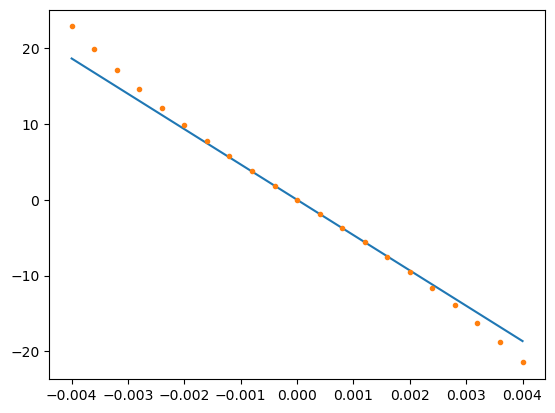

In [299]:
x = np.linspace(-4e-3, 4e-3, 100)
kickx = np.polyval(bn[::-1], x)
plt.plot(x, 1e6*kickx)

idx = posy.index(0)
rx0, ry0, pxf, pyf, rxf, ryf =\
    calc_idkmap_kicks(idkickmap, plane_idx=idx, var='X')
plt.plot(rx0, 1e6*pxf, '.')

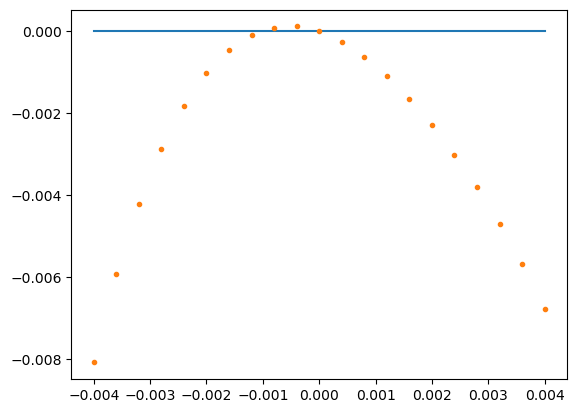

In [300]:
kicky = np.polyval(an[::-1], x)
plt.plot(x, 1e6*kicky)

idx = posy.index(0)
rx0, ry0, pxf, pyf, rxf, ryf =\
    calc_idkmap_kicks(idkickmap, plane_idx=idx, var='X')
plt.plot(rx0, 1e6*pyf, '.')

In [301]:
def calc_b(bn, an, x, y):
    polyb = np.array(bn) 
    polya = np.array(an)
    b = 0 + 0j
    for n in np.arange(len(polyb)):
        b += (polyb[n]+polya[n]*1j)*(x + y*1j)**n
    return b.real, b.imag

In [230]:
posy

[-0.0025,
 -0.002,
 -0.0015,
 -0.001,
 -0.0005,
 0.0,
 0.0005,
 0.001,
 0.0015,
 0.002,
 0.0025]

In [309]:
y=0.00

by = list()
bx = list()
xlist = idkickmap.posx
for x in xlist:
    by_, bx_ = calc_b(bn*10/1.2, an*10/1.2, x, y)
    by.append(by_)
    bx.append(bx_)

by = np.array(by)
bx = np.array(bx)

(-21.484243862600348, 22.887300599002383)

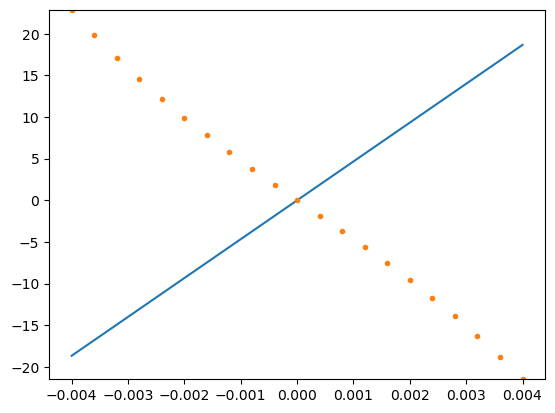

In [310]:
kickx_eq = -1*by*1.2/10
kicky_eq = bx*1.2/10

idx = posy.index(y)
rx0, ry0, pxf, pyf, rxf, ryf =\
    calc_idkmap_kicks(idkickmap, plane_idx=idx, var='X')

plt.plot(xlist, 1e6*kickx_eq)
plt.plot(xlist, 1e6*pxf, '.')
plt.ylim(1e6*np.min(pxf), 1e6*np.max(pxf))

(-0.008078810674371889, 0.00012183126109683193)

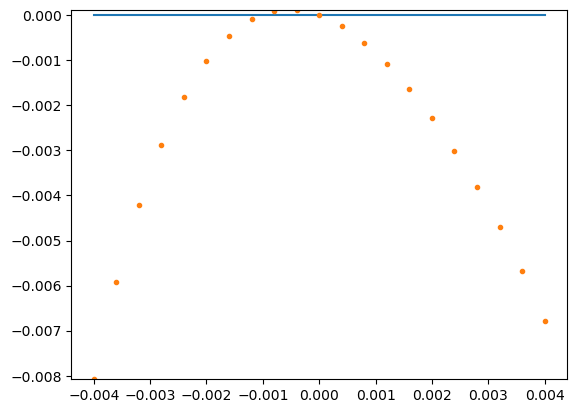

In [311]:
idx = posy.index(y)
rx0, ry0, pxf, pyf, rxf, ryf =\
    calc_idkmap_kicks(idkickmap, plane_idx=idx, var='X')

plt.plot(xlist, 1e6*kicky_eq)
plt.plot(xlist, 1e6*pyf, '.')
plt.ylim(1e6*np.min(pyf), 1e6*np.max(pyf))

In [312]:
posx

[-0.004,
 -0.0036,
 -0.0032,
 -0.0028,
 -0.0024,
 -0.002,
 -0.0016,
 -0.0012,
 -0.0008,
 -0.0004,
 0.0,
 0.0004,
 0.0008,
 0.0012,
 0.0016,
 0.002,
 0.0024,
 0.0028,
 0.0032,
 0.0036,
 0.004]

In [305]:
x=-0.00

by = list()
bx = list()
ylist = idkickmap.posy
for y in ylist:
    by_, bx_ = calc_b(bn*10/1.2, an*10/1.2, x, y)
    by.append(by_)
    bx.append(bx_)

by = np.array(by)
bx = np.array(bx)

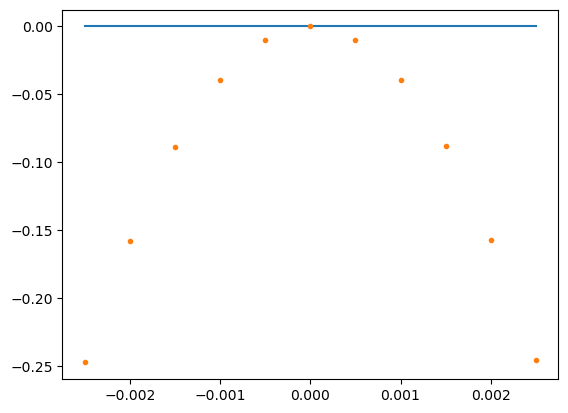

In [306]:
kickx_eq = -1*by*1.2/10
kicky_eq = bx*1.2/10

idx = posx.index(x)
rx0, ry0, pxf, pyf, rxf, ryf =\
    calc_idkmap_kicks(idkickmap, plane_idx=idx, var='Y')

plt.plot(ylist, 1e6*kickx_eq)
plt.plot(ylist, 1e6*pxf, '.')

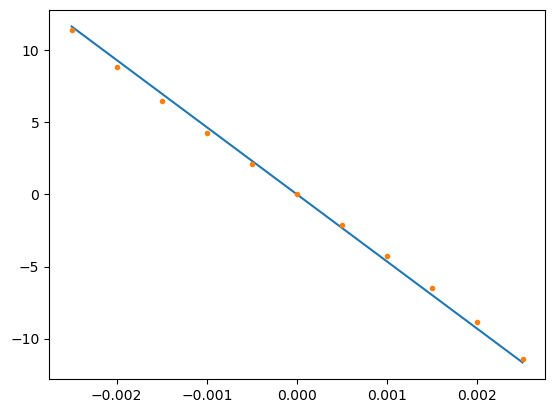

In [307]:
idx = posx.index(x)
rx0, ry0, pxf, pyf, rxf, ryf =\
    calc_idkmap_kicks(idkickmap, plane_idx=idx, var='Y')

plt.plot(ylist, 1e6*kicky_eq)
plt.plot(ylist, 1e6*pyf, '.')

In [238]:
def calc_b(bn, an, x, y):
    polyb = np.array(bn) 
    polya = np.array(an)
    b = 0 + 0j
    for n in np.arange(len(polyb)):
        b += (polyb[n]+polya[n]*1j)*(x + y*1j)**n
    return b.real, b.imag

In [313]:
def calc_obj_function(bn, an, idkickmap):
    brho = 10
    xlist = idkickmap.posx
    ylist = idkickmap.posy
    kickx = np.zeros((len(ylist), len(xlist)))
    kicky = np.zeros((len(ylist), len(xlist)))
    pxf = np.zeros((len(ylist), len(xlist)))
    pyf = np.zeros((len(ylist), len(xlist)))
    for i, y in enumerate(ylist):
        for j, x in enumerate(xlist):
            by_, bx_ = calc_b(bn*brho/1.2, an*brho/1.2, x, y)
            kickx[i, j] = 1*by_*1.2/brho
            kicky[i, j] = bx_*1.2/brho
        pxf[i, :] = idkickmap.kickx[i, :]/brho**2
        pyf[i, :] = idkickmap.kicky[i, :]/brho**2

    residuex = np.sum((kickx-pxf)**2)
    residuey = np.sum((kicky-pyf)**2)
    residue = np.sqrt((residuex + residuey)/(kickx.size+kicky.size))
    return residue

In [329]:
import numpy as np
import matplotlib.pyplot as plt
from idanalysis import IDKickMap
from apsuite.optimization import SimulAnneal

kname = './results/model/kickmaps/kickmap-ID_width45_phaseneg13p125_gap26p2-shifted_on_axis-filtered.txt'
idkickmap = IDKickMap(kmap_fname=kname)
posx = list(idkickmap.posx)
posy = list(idkickmap.posy)

bn0 = [ -1.52207781e-20, +4.66509611e-03, +1.46231274e-04, +5.28249608e+01,]

an0 = [-3.04566864e-21, -3.93491336e-07, -3.07796763e-04,  3.34376437e-02,]

bn0 = np.array(bn0)
an0 = np.array(an0)

residue0 = calc_obj_function(bn0, an0, idkickmap)
print(residue0)

2.211754419991691e-05


In [330]:
class SMA(SimulAnneal):

    def __init__(self, bn0, an0, idkickmap, save=False, niter=2000):
        self.bn0 = bn0
        self.an0 = an0
        self.idkickmap = idkickmap
        SimulAnneal.__init__(self, save=save, use_thread=False)
        self.niter = niter

    def initialization(self):
        bn0 = self.bn0
        an0 = self.an0
        self.position = np.concatenate((bn0, an0))
        self.limits_upper = np.concatenate((1*np.abs(bn0), 1*np.abs(an0)))
        self.limits_lower = np.concatenate((-1*np.abs(bn0), -1*np.abs(an0)))
        self.deltas = np.concatenate((bn0, an0))*0.1
        self.temperature = 0.1

    @staticmethod
    def calc_b(bn, an, x, y):
        polyb = np.array(bn) 
        polya = np.array(an)
        b = 0 + 0j
        for n in np.arange(len(polyb)):
            b += (polyb[n]+polya[n]*1j)*(x + y*1j)**n
        return b.real, b.imag

    def calc_obj_fun(self):
        brho = 10
        xlist = self.idkickmap.posx
        ylist = self.idkickmap.posy
        bn = self.position[:int(len(self.position)/2)]
        an = self.position[int(len(self.position)/2):]
        kickx = np.zeros((len(ylist), len(xlist)))
        kicky = np.zeros((len(ylist), len(xlist)))
        pxf = np.zeros((len(ylist), len(xlist)))
        pyf = np.zeros((len(ylist), len(xlist)))
        for i, y in enumerate(ylist):
            for j, x in enumerate(xlist):
                by_, bx_ = self.calc_b(bn*brho/1.2, an*brho/1.2, x, y)
                kickx[i, j] = -1*by_*1.2/brho
                kicky[i, j] = bx_*1.2/brho
            pxf[i, :] = self.idkickmap.kickx[i, :]/brho**2
            pyf[i, :] = self.idkickmap.kicky[i, :]/brho**2

        residuex = np.sum((kickx-pxf)**2)
        residuey = np.sum((kicky-pyf)**2)
        residue = np.sqrt((residuex + residuey)/(kickx.size+kicky.size))
        return residue

In [331]:
sma = SMA(bn0, an0, idkickmap)
sma.start()

>>> Iteraction Number:1
Better solution found! Obj. Func: 0.000012
Number of accepted solutions: 1
>>> Iteraction Number:2
Better solution found! Obj. Func: 0.000012
Number of accepted solutions: 2
>>> Iteraction Number:3
Worse solution accepted! [-1.52207781e-20  4.46946431e-03  1.46231274e-04  5.28249608e+01
 -2.81270273e-21 -3.82740681e-07 -2.80119884e-04  3.16430726e-02]
Temperature is: 0.02928932188134525
Better solution found! Obj. Func: 0.000013
Number of accepted solutions: 3
>>> Iteraction Number:4
Worse solution accepted! [-1.37931239e-20  4.61853524e-03  1.45517753e-04  4.93550001e+01
 -2.63725070e-21 -3.72306627e-07 -2.94556737e-04  2.98599411e-02]
Temperature is: 0.018568686013153462
Better solution found! Obj. Func: 0.000013
Number of accepted solutions: 4
>>> Iteraction Number:5
Worse solution accepted! [-1.34725924e-20  4.66509611e-03  1.42930656e-04  4.74350335e+01
 -2.35771845e-21 -3.93491336e-07 -2.67945867e-04  3.12839089e-02]
Temperature is: 0.012379124008768973
Be

1.2734091614271112e-05
1.0307897415623773e-05


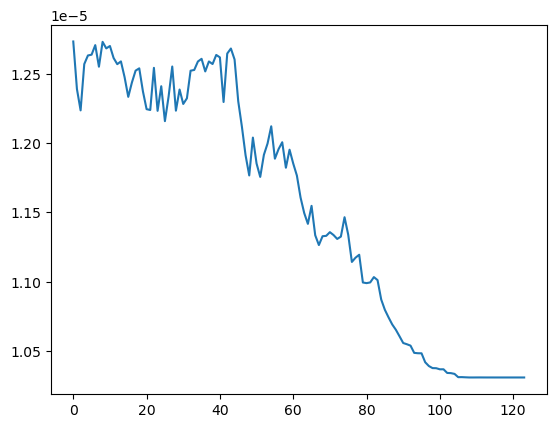

In [332]:
plt.plot(sma.hist_best_objfunc)
print(sma.hist_best_objfunc[0])
print(sma.hist_best_objfunc[-1])

In [210]:
fit = sma.hist_best_positions[-1]
bn = fit[:int(len(fit)/2)]
an = fit[int(len(fit)/2):]

In [211]:
print(bn)
print(an)

[ 1.52207781e-20 -4.66509611e-03 -1.46231274e-04 -5.28249608e+01
 -5.60065843e+02  9.37973110e+05]
[-3.04566864e-21 -3.93491336e-07 -3.07796763e-04  3.34376437e-02
 -1.78692277e+01  1.42339107e+01]


In [121]:
bn0 = bn
an0 = an